In [1]:
!pip install sounddevice

In [2]:
import math
import random
import numpy as np
import pandas as pd
import sounddevice as sd
import matplotlib.pyplot as plt

### Gradiente descendiente (15%), estaba en un parque de la ciudad y escuche un ruido constante. Entonces tomé mi celular y realice la grabación del sonido, observando la siguiente gráfica.


In [29]:
df = pd.read_csv('datos/senal.csv')

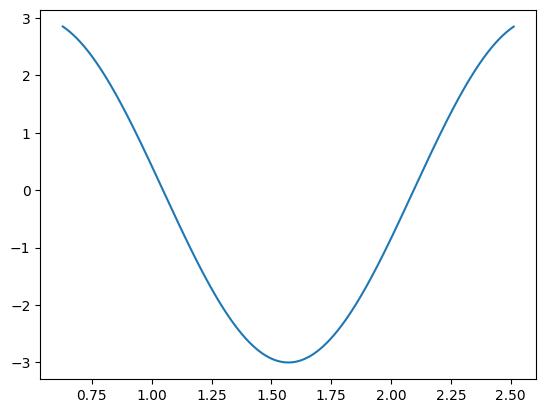

In [30]:
plt.plot(df['x'],df['y'])
x = df['x']
y = df['y']

In [31]:
def y_predict(a, b, c, d, x):
    return a*math.sin(b*x+c)+d

def gradient_descent(x, y, epochs):
    lr = 0.01
    n = len(x)
    batch = 500
    rsl = []
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0

    for i in range(epochs):
        a_gradient = 0
        b_gradient = 0
        c_gradient = 0
        d_gradient = 0
        e = 0
        
        for m in range(batch):
            ix = int(random.uniform(0, n))
            error = y[ix] - y_predict(a, b, c, d, x[ix])
            
            a_gradient += -2 * math.sin(b * x[ix] + c) * error
            b_gradient += -2 * x[ix] * math.cos(b * x[ix] + c) * error
            c_gradient += -2 * math.cos(b * x[ix] + c) * error
            d_gradient += -2 * error
        
            e += error ** 2

        a -= lr * a_gradient / batch
        b -= lr * b_gradient / batch
        c -= lr * c_gradient / batch
        d -= lr * d_gradient / batch
        e /= batch

        rsl.append([a, b, c, e])
        print(f"error:{e} period:{b} amplitude:{a} constants:{c}\n")

    return rsl, a, b, c

In [32]:
epochs = [1000, 2000]

In [33]:
resultados, a, b, c = gradient_descent(x, y, epochs=10)

error:5.243208050972885 period:0.5771144098761883 amplitude:0.8562217940601199 constants:0.6726094990118239

error:5.450096298462873 period:0.5754173850538802 amplitude:0.8313926684053652 constants:0.6726722139550979

error:5.425260039506468 period:0.5739852732861255 amplitude:0.8099547818785521 constants:0.6734845144830227

error:5.018876823889779 period:0.5715604570384535 amplitude:0.7897152387532042 constants:0.673518585431617

error:5.048295864823709 period:0.5684523532300311 amplitude:0.7685141138193093 constants:0.6730319017689674

error:4.910712081891341 period:0.5654068693970427 amplitude:0.7491993942194931 constants:0.672809764060407

error:5.258727838865933 period:0.5620585847289786 amplitude:0.7281816624819475 constants:0.6724428683954841

error:4.5762098294150295 period:0.558315408511937 amplitude:0.7107850510882691 constants:0.6717642238052643

error:4.587832672539875 period:0.5561351541538938 amplitude:0.6944745820494076 constants:0.6723178909465873

error:4.6265909386984

In [34]:
tabla_resultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tabla_resultados)

   Amplitude    Period  Constant     Error
0   0.856222  0.577114  0.672609  5.243208
1   0.831393  0.575417  0.672672  5.450096
2   0.809955  0.573985  0.673485  5.425260
3   0.789715  0.571560  0.673519  5.018877
4   0.768514  0.568452  0.673032  5.048296
5   0.749199  0.565407  0.672810  4.910712
6   0.728182  0.562059  0.672443  5.258728
7   0.710785  0.558315  0.671764  4.576210
8   0.694475  0.556135  0.672318  4.587833
9   0.675475  0.553855  0.672441  4.626591


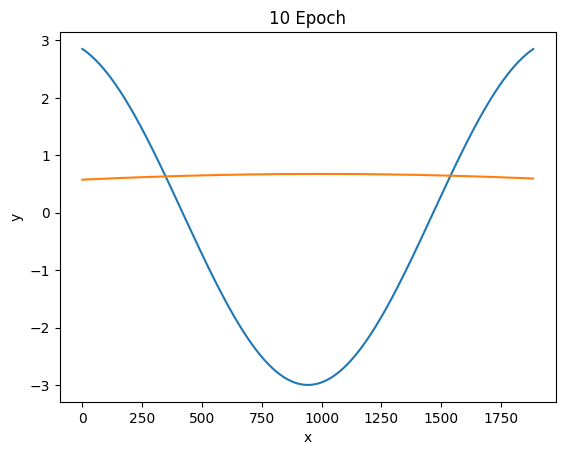

In [35]:
plt.title("10 Epoch")
plt.xlabel('x')
plt.ylabel("y")
plt.plot(y)
ix = -1
plt.plot([y_predict(a,b,c,0,xi)for xi in x[:ix]])

plt.show()

In [36]:
resultados, a, b, c = gradient_descent(x, y, epochs=400)

error:3.8624788597036592 period:0.6938646768135915 amplitude:0.001425420849181347 constants:0.9355802262074886

error:4.056066988859923 period:0.6952789510860646 amplitude:-0.006274293260078501 constants:0.9394921871081561

error:4.21165783930187 period:0.6984693278077833 amplitude:-0.01631366187430495 constants:0.9444529453679371

error:3.8976595338604736 period:0.6964541720843991 amplitude:-0.021312951485455218 constants:0.9467453749067549

error:3.9575584808101354 period:0.6939537546953432 amplitude:-0.026427337968549153 constants:0.9487960309751525

error:4.19812079522772 period:0.6918474227062847 amplitude:-0.03288665461267255 constants:0.9512752044525771

error:4.09879809852623 period:0.6897864394611082 amplitude:-0.039275195087156 constants:0.953707303899932

error:3.784183530012607 period:0.6886112843062494 amplitude:-0.04460854235666206 constants:0.9562531951789129

error:4.044935400519067 period:0.6865804819881001 amplitude:-0.05200546033446961 constants:0.9586076987262676

e

error:3.978140947816816 period:0.4156100318749673 amplitude:-0.24245121273039738 constants:1.06979722141871

error:4.092444894769447 period:0.41173362498573857 amplitude:-0.24078393883244043 constants:1.0701651288733356

error:3.8647473226688422 period:0.4088859016481536 amplitude:-0.2408630441953794 constants:1.0707913692628765

error:3.859029556110608 period:0.4058418028756571 amplitude:-0.2434025528319256 constants:1.0712119704754073

error:3.8552024038686254 period:0.4021290667468674 amplitude:-0.24160954296388226 constants:1.0714809594009018

error:3.9513160350977934 period:0.40037982804558725 amplitude:-0.2473847533411193 constants:1.072491226205517

error:3.5841048736651793 period:0.3958686386235155 amplitude:-0.24720109331790135 constants:1.0720907929827477

error:3.8855901600880514 period:0.39196926497094864 amplitude:-0.24636380453044818 constants:1.072200878660479

error:3.9177445503626154 period:0.3889161740138609 amplitude:-0.24630052731958857 constants:1.0726993448371167


error:3.8857748117777198 period:0.1642390572550769 amplitude:-0.2428549133085276 constants:1.0795118103151826

error:3.8033161834651206 period:0.16297245764875418 amplitude:-0.242017330766274 constants:1.0799454224356944

error:3.722869271171632 period:0.16152542709700485 amplitude:-0.2418047242449884 constants:1.079958612494461

error:3.7884951501149997 period:0.15902707347987718 amplitude:-0.24486308378548372 constants:1.0796036036188454

error:3.9011725879168204 period:0.15743444326840386 amplitude:-0.24476420071972993 constants:1.0792835133433607

error:3.9566944486081894 period:0.15538080892608067 amplitude:-0.24615548545696392 constants:1.0788258546166507

error:3.9346750585150176 period:0.1542790075904359 amplitude:-0.24478355453074863 constants:1.0789003047881338

error:3.6810763935097435 period:0.15269306700989096 amplitude:-0.24525676859918888 constants:1.0788481088821604

error:3.8354159655866766 period:0.15103606969585 amplitude:-0.24573917056211667 constants:1.078617985955

error:3.8741391443327506 period:0.0672240345382466 amplitude:-0.2666651588664006 constants:1.0709143586972474

error:3.824465313937632 period:0.06705878800187848 amplitude:-0.2659282042145681 constants:1.071224237212408

error:4.054470649673139 period:0.06722929852642176 amplitude:-0.26502889682342873 constants:1.0715274511389914

error:3.9473516290904667 period:0.0653667004611228 amplitude:-0.2670993863707637 constants:1.0706458020863212

error:3.7430683057627774 period:0.06616033044357922 amplitude:-0.26472973299694247 constants:1.071671177105198

error:3.7812384293481642 period:0.06524323732938447 amplitude:-0.2655868687242155 constants:1.0712552044024501

error:3.8873196399233065 period:0.06257018572673016 amplitude:-0.2689755652430051 constants:1.0698084409953155

error:4.02001009351306 period:0.06265087175926583 amplitude:-0.2680965365329451 constants:1.0701547672375977

error:3.600946744429157 period:0.058839214495176956 amplitude:-0.2729233451297564 constants:1.0681375728000253

error:3.778271351148952 period:0.026626271620687883 amplitude:-0.26395557512258416 constants:1.071975414791979

error:4.022187357782464 period:0.027708346446796175 amplitude:-0.26137413570879336 constants:1.0732925235671533

error:3.8310975941486394 period:0.029027467407742442 amplitude:-0.25992111939532125 constants:1.0739647031573551

error:3.8966006584444917 period:0.02598768721379328 amplitude:-0.2628476382535631 constants:1.0725949279952065

error:3.935231105204153 period:0.027191284695050652 amplitude:-0.26136352456871387 constants:1.0733027166203948

error:3.8759240774381296 period:0.02695193405074457 amplitude:-0.26129211984158085 constants:1.0733409929156077

error:4.263855846003138 period:0.025479830124306626 amplitude:-0.2615752992015109 constants:1.0732775845731077

error:3.986071085366742 period:0.02489324689479947 amplitude:-0.26240590489953136 constants:1.0728483486132558

error:3.9653725380417035 period:0.02405822524183337 amplitude:-0.2640084293813841 constants:1.07201

In [37]:
tabla_resultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tabla_resultados)

     Amplitude    Period  Constant     Error
0     0.001425  0.693865  0.935580  3.862479
1    -0.006274  0.695279  0.939492  4.056067
2    -0.016314  0.698469  0.944453  4.211658
3    -0.021313  0.696454  0.946745  3.897660
4    -0.026427  0.693954  0.948796  3.957558
..         ...       ...       ...       ...
395  -0.259865  0.022741  1.074193  3.940293
396  -0.260200  0.021791  1.074056  4.072257
397  -0.260734  0.020758  1.073816  3.782008
398  -0.260329  0.020913  1.074017  3.994804
399  -0.261477  0.019676  1.073451  3.973533

[400 rows x 4 columns]


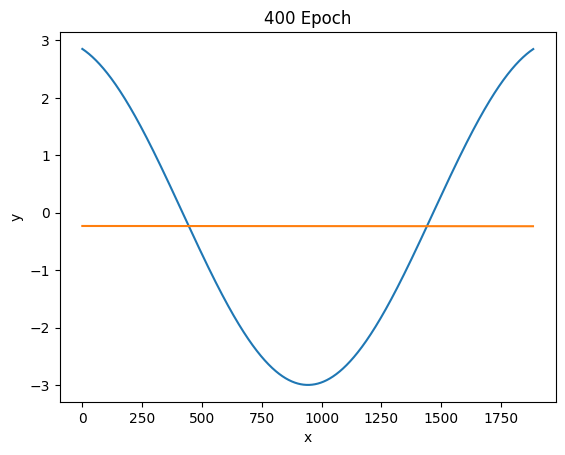

In [38]:
plt.title("400 Epoch")
plt.xlabel('x')
plt.ylabel("y")
plt.plot(y)
ix = -1
plt.plot([y_predict(a,b,c,0,xi)for xi in x[:ix]])

plt.show()

In [39]:
resultados, a, b, c = gradient_descent(x, y, epochs=10)

error:3.903052307260264 period:0.3791749535586728 amplitude:0.15669743040229317 constants:0.30635496984932975

error:4.325054831645092 period:0.3658784956221701 amplitude:0.14772999394384553 constants:0.2991584407007434

error:4.114866416879003 period:0.35563169957269675 amplitude:0.14171806176836335 constants:0.2936082583102875

error:4.056983718331781 period:0.3445837780687285 amplitude:0.13514753803096147 constants:0.2879153187651434

error:4.082452063417139 period:0.3330321137089312 amplitude:0.12846937478192935 constants:0.28171210780348477

error:3.9622476472979793 period:0.32096011391778095 amplitude:0.12158818524805616 constants:0.27521069379707463

error:4.157402808234956 period:0.3113459371480057 amplitude:0.11673430916324817 constants:0.2700738278212289

error:4.034825971482024 period:0.3020536257579261 amplitude:0.11218708870888616 constants:0.26511359810945745

error:4.006046143862903 period:0.2911005317609606 amplitude:0.10673610401833986 constants:0.25930349259803426

er

In [40]:
tabla_resultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tabla_resultados)

   Amplitude    Period  Constant     Error
0   0.156697  0.379175  0.306355  3.903052
1   0.147730  0.365878  0.299158  4.325055
2   0.141718  0.355632  0.293608  4.114866
3   0.135148  0.344584  0.287915  4.056984
4   0.128469  0.333032  0.281712  4.082452
5   0.121588  0.320960  0.275211  3.962248
6   0.116734  0.311346  0.270074  4.157403
7   0.112187  0.302054  0.265114  4.034826
8   0.106736  0.291101  0.259303  4.006046
9   0.103613  0.283685  0.255903  4.059225


In [41]:
x_min = np.min(x)
long_s = [y_predict(a, b, c, 0, xi) for xi in np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)]

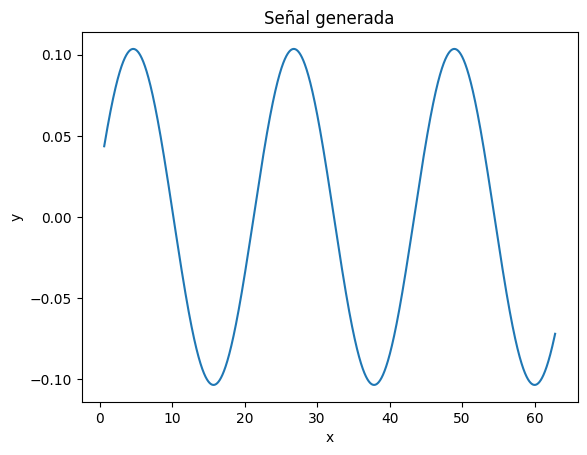

In [42]:
plt.plot(np.arange(x_min, 20 * math.pi, 0.001), long_s)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal generada')
plt.show()

In [43]:
resultados, a, b, c = gradient_descent(x, y, epochs=400)

error:4.241314342600575 period:0.18167349609693367 amplitude:0.3831601646150452 constants:0.946613897408344

error:4.309693328540592 period:0.17350659460484508 amplitude:0.3702438166716682 constants:0.9418990970243344

error:4.535973064011728 period:0.16542941599647665 amplitude:0.3583779278972329 constants:0.9374794339424684

error:4.494584196646544 period:0.15728986502292297 amplitude:0.34719886533456595 constants:0.9333897414101839

error:4.466836567144592 period:0.1478365839331278 amplitude:0.3341666554460288 constants:0.9282063335600741

error:4.314791902638409 period:0.13927239480516346 amplitude:0.3230801352284145 constants:0.9234631558233034

error:3.960370561471192 period:0.1309016472669604 amplitude:0.3123305210501362 constants:0.9184694955620288

error:4.628264473768208 period:0.12177402823014995 amplitude:0.3019942257438428 constants:0.9138025792129748

error:4.217287156039675 period:0.11513894198575145 amplitude:0.2953182197982866 constants:0.9107125640081544

error:4.2174

error:3.8436403762157445 period:-0.10760219613541493 amplitude:0.11488188213669305 constants:0.7502943147217709

error:4.074072076913244 period:-0.11293445950488913 amplitude:0.11242344887596611 constants:0.7465518037304076

error:3.9773856282309685 period:-0.11066292748405727 amplitude:0.11265340594041535 constants:0.7470988557540741

error:3.7438601212830926 period:-0.11351958825363306 amplitude:0.11062748732738761 constants:0.7442371821980521

error:4.004089713081462 period:-0.11332936386667918 amplitude:0.11015060144619608 constants:0.743620259567955

error:3.808076344466993 period:-0.10938627478876561 amplitude:0.11028709988306551 constants:0.7443723227138638

error:3.898651331036969 period:-0.1115820254229872 amplitude:0.10956669952389379 constants:0.7430764836763718

error:3.9089573430633413 period:-0.11123425704025763 amplitude:0.10929908815278598 constants:0.7427287500475774

error:3.9242427654382195 period:-0.11308669090130662 amplitude:0.10892796002300195 constants:0.7418737

error:3.8528454565821475 period:-0.06827106590413175 amplitude:0.09429650330655043 constants:0.7236880265977649

error:4.137383127280366 period:-0.06387949137893269 amplitude:0.0956925141246433 constants:0.7257568492503156

error:3.7658494469442223 period:-0.06559826126678694 amplitude:0.09511010586638359 constants:0.7248609661309748

error:3.8209425162260677 period:-0.06636366385751702 amplitude:0.09447240104224536 constants:0.7240016552832143

error:4.00275413244171 period:-0.06300648120219193 amplitude:0.09516070628670302 constants:0.7251296201611492

error:3.8476838438421535 period:-0.061074250189175186 amplitude:0.09579462822215312 constants:0.7260245468639398

error:3.7421889704632054 period:-0.06420062715208032 amplitude:0.09426029561105811 constants:0.7239055664304648

error:3.997348238966578 period:-0.0638870268826795 amplitude:0.09482705318514188 constants:0.7245462965534252

error:4.054654088798653 period:-0.06825021498498052 amplitude:0.09245578485796525 constants:0.7213058

error:4.131346995829411 period:-0.04346102602817309 amplitude:0.08758330762461204 constants:0.7157756809916883

error:3.9629070193969134 period:-0.043970253174856776 amplitude:0.08666805688600653 constants:0.7146552136891635

error:4.058710308497557 period:-0.04419119978791225 amplitude:0.08689863728149956 constants:0.7148827622765263

error:4.058119377029294 period:-0.04165350223192571 amplitude:0.08812461288670005 constants:0.7164851723233976

error:3.9426255220291235 period:-0.04083162810083567 amplitude:0.0883330212124828 constants:0.7167684644036201

error:3.850065724525077 period:-0.042090906655308895 amplitude:0.08753332392504498 constants:0.715733212246866

error:3.859404287866355 period:-0.045342822909760806 amplitude:0.0859752116061317 constants:0.713661687260065

error:3.8149471739140934 period:-0.04614328785606692 amplitude:0.08597108278245572 constants:0.713568653890664

error:3.5901239833296206 period:-0.04570508143952297 amplitude:0.08666506049237138 constants:0.71439108

error:3.8701214969650213 period:-0.03720161573481938 amplitude:0.08416699149186432 constants:0.7115702989505529

error:4.032999153178543 period:-0.03541407249161057 amplitude:0.08489897080635093 constants:0.7125293344026341

error:3.902563369676212 period:-0.036075769943712845 amplitude:0.08398215466182991 constants:0.7114059855835589

error:3.9908551631341105 period:-0.03387994099136444 amplitude:0.08512706845598358 constants:0.7128711524695026

error:4.148864412796882 period:-0.031173242688549856 amplitude:0.08683062281010982 constants:0.7150053808869397

error:3.9023774660862838 period:-0.029586937311366183 amplitude:0.08699086665057545 constants:0.7152716388220153

error:3.9709677902091527 period:-0.03207866043302599 amplitude:0.08496686972828954 constants:0.712786200025744

error:3.897073139815043 period:-0.02643677753952451 amplitude:0.08789003941894757 constants:0.7165056055525431



In [44]:
tabla_resultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tabla_resultados)

     Amplitude    Period  Constant     Error
0     0.383160  0.181673  0.946614  4.241314
1     0.370244  0.173507  0.941899  4.309693
2     0.358378  0.165429  0.937479  4.535973
3     0.347199  0.157290  0.933390  4.494584
4     0.334167  0.147837  0.928206  4.466837
..         ...       ...       ...       ...
395   0.085127 -0.033880  0.712871  3.990855
396   0.086831 -0.031173  0.715005  4.148864
397   0.086991 -0.029587  0.715272  3.902377
398   0.084967 -0.032079  0.712786  3.970968
399   0.087890 -0.026437  0.716506  3.897073

[400 rows x 4 columns]


In [45]:
x_min = np.min(x)
long_s = [y_predict(a, b, c, 0, xi) for xi in np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)]

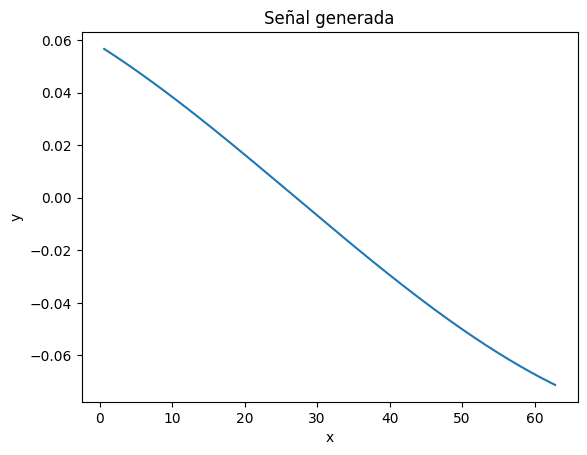

In [46]:
plt.plot(np.arange(x_min, 20 * math.pi, 0.001), long_s)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal generada')
plt.show()

In [47]:
sd.play(long_s)